<a href="https://colab.research.google.com/github/Faliirham/PCVK25_3F_11/blob/main/Week3_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***D. PRAKTIKUM PERTEMUAN 3***

**Fali Irham Maulana / 2341720121**

**TI 3F**

---



# ***D1. Operasi Citra Sederhana***

In [2]:
#Load library

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan50


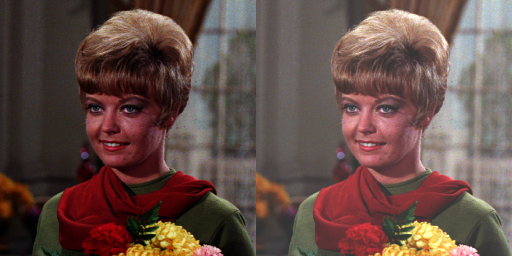

In [4]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = float(input('Masukkan nilai kecerahan'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c]+ brightness, 0, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)



---


# ***TUGAS PRAKTIKUM D1***

 Melakukan Perubahan Inverse pada KTM 
--------------------------------------


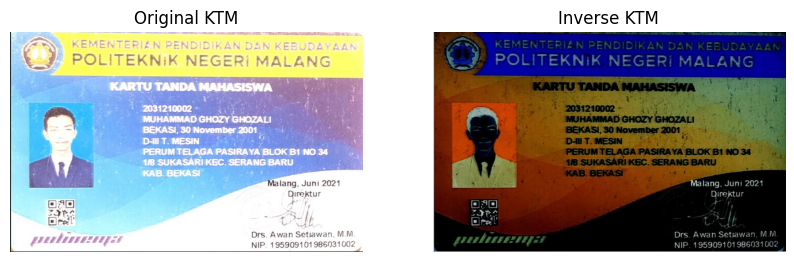

In [5]:
#1. Mengimplementasikan inverse citra

print(' Melakukan Perubahan Inverse pada KTM ')
print('--------------------------------------')

ktm = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/KTM lama.jpg')

inverse_ktm = 255 - ktm

# final_frame = cv.hconcat((ktm, inverse_ktm))
# cv2_imshow(final_frame)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))
plt.title('Original KTM')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(inverse_ktm, cv.COLOR_BGR2RGB))
plt.title('Inverse KTM')
plt.axis('off')

plt.show()

Mengimplementasikan transformasi kontras
---------------------------------------
Masukkan nilai kecerahan 50
Masukkan nilai kontras 2


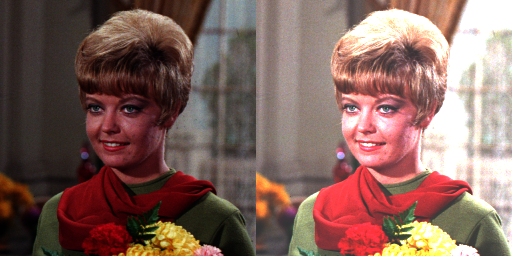

In [6]:
#2. Mengimplementasikan transformasi contrast

print('Mengimplementasikan transformasi kontras')
print('---------------------------------------')

try:
  brightness = float(input('Masukkan nilai kecerahan '))
  contrast = float(input('Masukkan nilai kontras '))
except ValueError:
  print('Error, not a number')


# g(x) = alpha * f(x) + beta
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)


final_frame_contrast = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame_contrast)

Mengimplementasikan transformasi logaritmik
-------------------------------------------
Masukkan nilai kecerahan 50


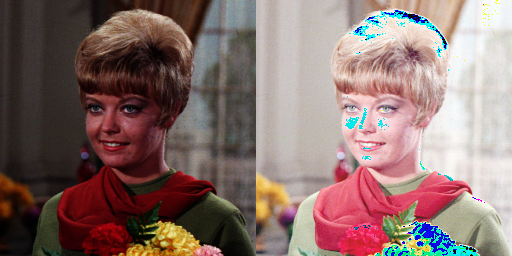

In [7]:
# 3 Mengimplementasi transformasi logarithmic brightness

print('Mengimplementasikan transformasi logaritmik')
print('-------------------------------------------')

try:
   c = float(input('Masukkan nilai kecerahan '))
except ValueError:
  print('Error, not a number')


log_image = c * np.log(1 + original)
log_image = np.array(log_image, dtype='uint8')

final_frame_log = cv.hconcat((original, log_image))

cv2_imshow(final_frame_log)

Mengimplementasikan transformasi grayscale (Metode Averaging) Manual
--------------------------------------------------------------------


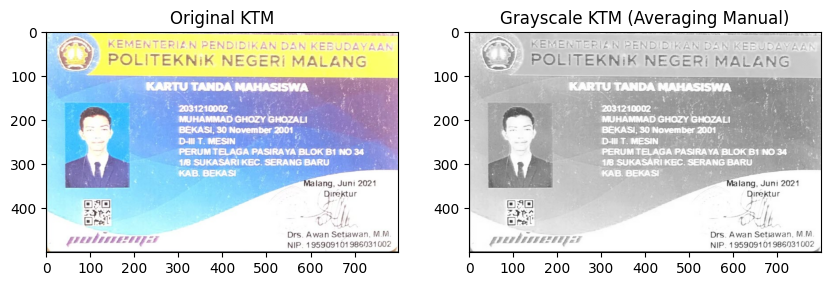

In [8]:
# 4. Mengimplementasikan transformasi grayscale

# A. Metode Averaging
print('Mengimplementasikan transformasi grayscale (Metode Averaging)')
print('--------------------------------------------------------------------')

# Mengambil dimensi gambar
height, width, channels = ktm.shape

grayscale_image_manual = np.zeros((height, width), dtype='uint8')

for y in range(height):
  for x in range(width):
    # Ngambil Value R ,G ,B tiap pixel nya
    r, g, b = ktm[y, x]

    # Menghitung Rata - rata dengan rumus R + G + B / 3
    average_value = (int(r) + int(g) + int(b)) // 3

    # Menyimpan Ke Array Grayscale
    grayscale_image_manual[y, x] = average_value

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))
plt.title('Original KTM')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image_manual, cmap='gray')
plt.title('Grayscale KTM (Averaging Manual)')
plt.show()

Mengimplementasikan transformasi grayscale (Metode Averaging) Manual
--------------------------------------------------------------------


/tmp/ipython-input-2592495673.py:16: RuntimeWarning: overflow encountered in scalar add
  lightness_value = (max(r, g, b) + min(r, g, b)) // 2


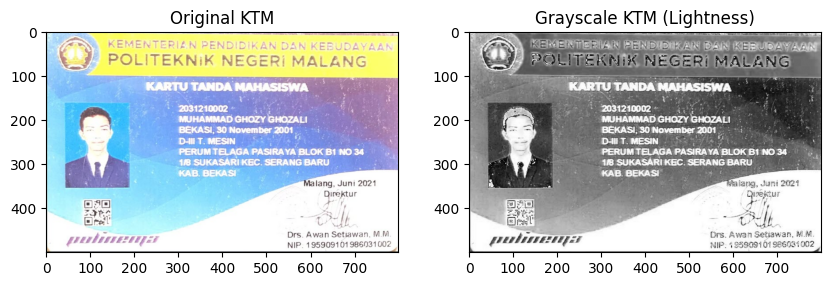

In [10]:
# B. LIghtness
print('Mengimplementasikan transformasi grayscale (Metode Lightness')
print('--------------------------------------------------------------------')

# Mengambil dimensi gambar
height, width, channels = ktm.shape

grayscale_image_manual = np.zeros((height, width), dtype='uint8')

for y in range(height):
  for x in range(width):
    # Ngambil Value R ,G ,B tiap pixel nya
    r, g, b = ktm[y, x]

    # #Grayscale%&$'()*++ = max[R, G, B] + min[R, G, B]
    lightness_value = (max(r, g, b) + min(r, g, b)) // 2

    # menyimpan ke Array Grayscale
    grayscale_image_manual[y, x] = lightness_value

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))
plt.title('Original KTM')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image_manual, cmap='gray')
plt.title('Grayscale KTM (Lightness)')
plt.show()

Mengimplementasikan transformasi grayscale (Metode Luminance)
-------------------------------------------------------------


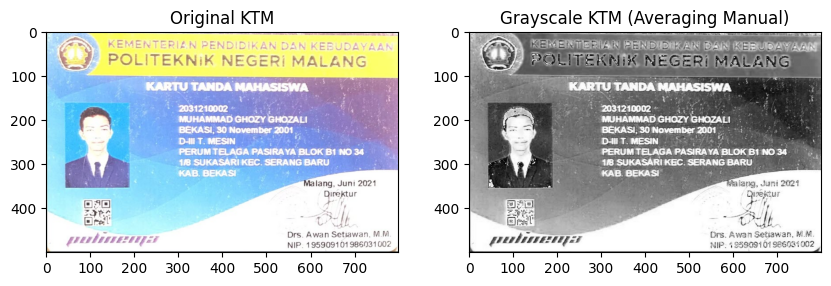

In [13]:
# C. Luminance
print('Mengimplementasikan transformasi grayscale (Metode Luminance)')
print('-------------------------------------------------------------')

# Mengambil dimensi gambar
height, width, channels = ktm.shape

grayscale_image_luminance = np.zeros((height, width), dtype='uint8')

for y in range(height):
  for x in range(width):
    # Ngambil Value R ,G ,B tiap pixel nya
    r, g, b = ktm[y, x]


     # Grayscale dengan metode luminanc
    luminance_value = int(0.299 * r + 0.587 * g + 0.114 * b)

     # Simpan ke array grayscale
    grayscale_image_luminance[y, x] = luminance_value

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))
plt.title('Original KTM')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image_manual, cmap='gray')
plt.title('Grayscale KTM (Luminance)')
plt.show()

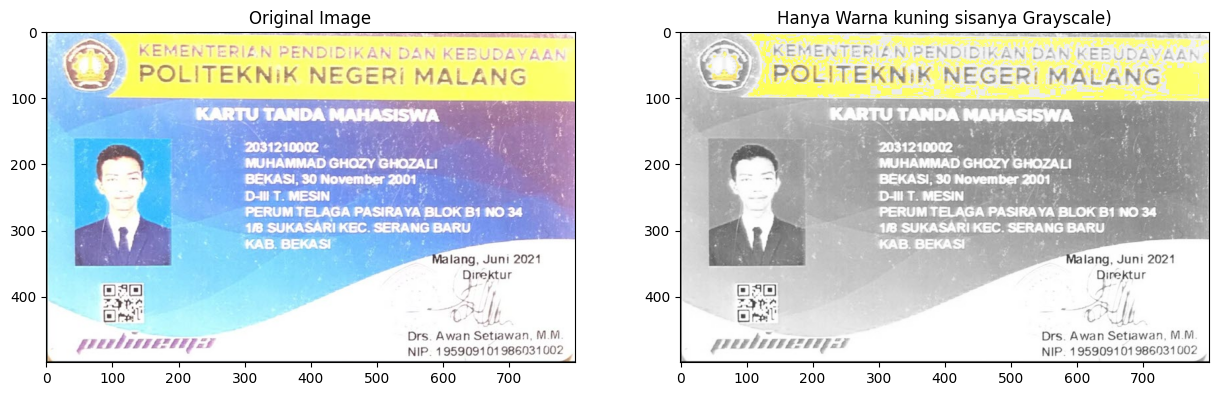

In [19]:
# 5. menampilkan warna tertentu pada citra, dan ubah warna lain menjadi grayscale.

# Konversi ke HSV agar mudah melakukan masking warna
hsv = cv.cvtColor(ktm, cv.COLOR_BGR2HSV)

# Rentang warna kuning (perkiraan)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Masking untuk warna kuning
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Buat citra grayscale dari gambar asli
gray = cv.cvtColor(ktm, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan: bagian biru tetap berwarna, sisanya grayscale
result = np.where(mask[:, :, np.newaxis] != 0, ktm, gray_bgr)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title("Hanya Warna kuning sisanya Grayscale)")
plt.show()